<a href="https://colab.research.google.com/github/sdave-connexion/Hierarical-sales-forecsting/blob/main/12months_Holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ID-2, 24 months training data and 12 months (2021) test data

In [1]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# PREDICTING FUTURE Traffic using Holt Winters






(24, 1)
            Sales
Date             
2019-01-01  21505
2019-02-01  19438
2019-03-01  21423
2019-04-01  19049
2019-05-01  19604


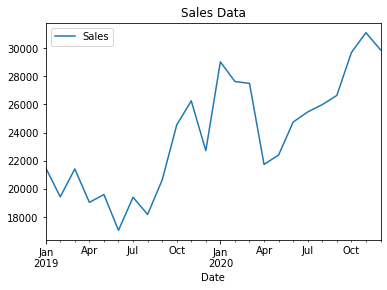

In [3]:
df = pd.read_csv('/content/train_12months.csv',index_col='Date', parse_dates=True)
# finding shape of the dataframe
print(df.shape)
# having a look at the data
print(df.head())
# plotting the original data
df[['Sales']].plot(title='Sales Data')

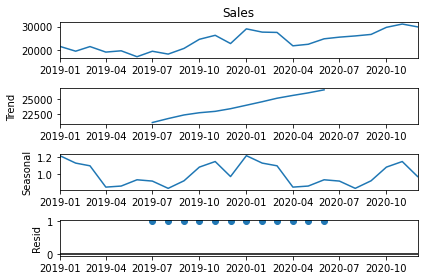

In [4]:
decompose_result = seasonal_decompose(df['Sales'],model='multiplicative',period=12)
decompose_result.plot();

In [6]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
w = 12
alpha = 1/(2*w)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


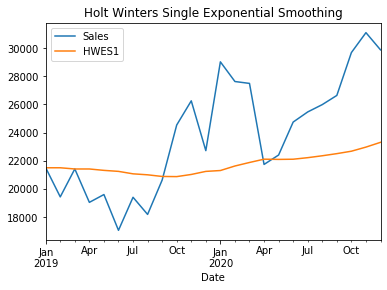

In [7]:
df['HWES1'] = SimpleExpSmoothing(df['Sales']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[['Sales','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


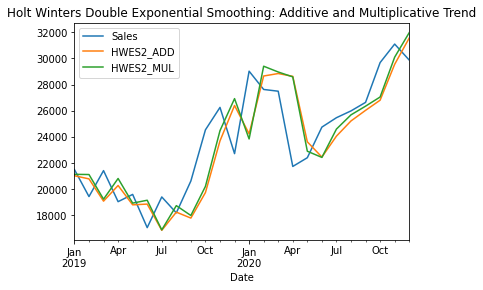

In [8]:
df['HWES2_ADD'] = ExponentialSmoothing(df['Sales'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['Sales'],trend='mul').fit().fittedvalues
df[['Sales','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


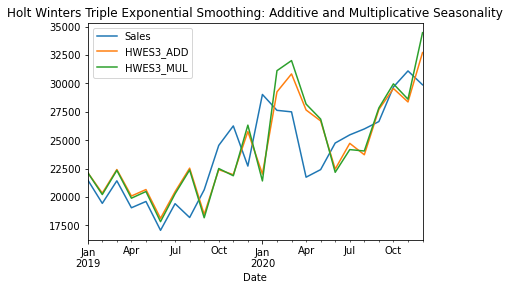

In [9]:
df['HWES3_ADD'] = ExponentialSmoothing(df['Sales'],trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['Sales'],trend='mul',seasonal='mul',seasonal_periods=7).fit().fittedvalues
df[['Sales','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [10]:
forecast_data = pd.read_csv('/content/test_12months.csv',index_col='Date',parse_dates=True)
forecast_data.index.freq = 'MS'

# Split into train and test set
train_df = df
test_df = forecast_data

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

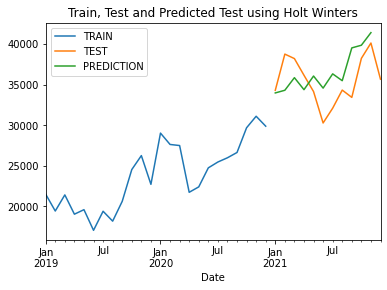

In [22]:
fitted_model = ExponentialSmoothing(train_df['Sales'],trend='add',seasonal='add',seasonal_periods=8).fit()
test_predictions = fitted_model.forecast(11)
train_df['Sales'].plot(legend=True,label='TRAIN')
test_df['Sales'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

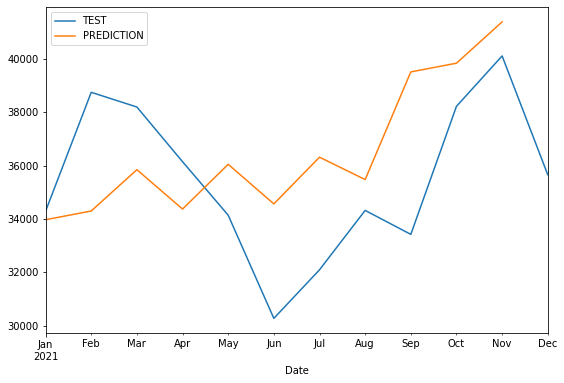

In [24]:
test_df['Sales'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION');

In [25]:
df_forecast = pd.DataFrame(test_predictions)
df_forecast

,0
2021-01-01,33969.078671
2021-02-01,34296.897188
2021-03-01,35845.746534
2021-04-01,34369.698374
2021-05-01,36047.183265
2021-06-01,34562.272099
2021-07-01,36314.104968
2021-08-01,35475.239926
2021-09-01,39510.612379
2021-10-01,39838.430896
